# Optical Identification of GRBs Using Machine Learning Techniques on Simulated Data 

## Exploratory Data Analysis

### Importing Data & Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_parquet('combined_qpo_vt_with_GRB.parquet', engine='fastparquet')
data.head()

,VT_ID,RA,DEC,MAGCAL_R0,MAGCAL_R1,MAGCAL_R2,MAGCAL_R3,MAGCAL_B0,MAGCAL_B1,MAGCAL_B2,...,EFLAG_B1,EFLAG_B2,EFLAG_B3,SEQFLAG0,SEQFLAG1,SEQFLAG2,SEQFLAG3,IS_GRB,CASE,SIM_ID
0,1,142.660568,42.577675,12.94,12.97,12.96,12.97,13.39,13.35,13.35,...,3,3,3,12200,22222,32222,42222,0,bright_case1,1
1,2,142.615478,42.549900,13.06,13.04,13.02,13.04,13.59,13.58,13.58,...,3,3,3,12200,22222,32222,42222,0,bright_case1,1
2,13,142.624680,42.599564,13.31,13.27,13.27,13.31,19.78,19.80,19.78,...,4,4,0,12200,22222,32222,42222,0,bright_case1,1
3,3,142.644562,42.573009,14.76,14.71,14.72,14.72,15.21,15.22,15.21,...,0,0,0,12200,22222,32222,42222,0,bright_case1,1
4,4,142.671173,42.606564,14.96,14.95,14.97,14.98,15.45,15.46,15.45,...,0,0,0,12200,22222,32222,42222,0,bright_case1,1


### Exploring Table

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313798 entries, 0 to 313797
Data columns (total 40 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   VT_ID      313798 non-null  int64  
 1   RA         313798 non-null  float64
 2   DEC        313798 non-null  float64
 3   MAGCAL_R0  229753 non-null  float64
 4   MAGCAL_R1  234744 non-null  float64
 5   MAGCAL_R2  233169 non-null  float64
 6   MAGCAL_R3  234242 non-null  float64
 7   MAGCAL_B0  189306 non-null  float64
 8   MAGCAL_B1  212247 non-null  float64
 9   MAGCAL_B2  212579 non-null  float64
 10  MAGCAL_B3  213286 non-null  float64
 11  MAGERR_R0  229753 non-null  float64
 12  MAGERR_R1  234744 non-null  float64
 13  MAGERR_R2  233169 non-null  float64
 14  MAGERR_R3  234242 non-null  float64
 15  MAGERR_B0  189306 non-null  float64
 16  MAGERR_B1  212247 non-null  float64
 17  MAGERR_B2  212579 non-null  float64
 18  MAGERR_B3  213286 non-null  float64
 19  MAGVAR_R1  212775 non-n

In [51]:
data['CASE'].value_counts()

CASE
bright_case2     64572
bright_case3     64572
bright_case4     62356
bright_case1a    61192
bright_case1     61106
Name: count, dtype: int64

Splitting dataframe by GRB cases: 
- b1 : bright_case1
- b1a : bright_case1a
- b2 : bright_case2
- b3 : bright_case3
- b4 : bright_case4

In [52]:
b1 = data[data['CASE']=='bright_case1'].drop(["CASE"],axis = 1)
b1a = data[data['CASE']=='bright_case1a'].drop(["CASE"], axis = 1)
b2 = data[data['CASE']=='bright_case2'].drop(["CASE"], axis = 1)
b3 = data[data['CASE']=='bright_case3'].drop(["CASE"], axis = 1)
b4 = data[data['CASE']=='bright_case4'].drop(["CASE"], axis = 1)
cases_dict = {'bright_case1':b1,
              'bright_case1a':b1a,
              'bright_case2':b2,
              'bright_case3':b3,
              'bright_case4':b4}

Exploring the distributions of positive and negative classes for 'IS_GRB' columns

In [53]:
for case, sub_data in cases_dict.items():
    counts = list(sub_data["IS_GRB"].value_counts())
    print(case+"|"+str(counts[0])+"|"+str(counts[1]))


bright_case1|60894|212
bright_case1a|60981|211
bright_case2|64359|213
bright_case3|64359|213
bright_case4|62142|214


### Missing Values

In [54]:
data.isnull().any()

VT_ID        False
RA           False
DEC          False
MAGCAL_R0     True
MAGCAL_R1     True
MAGCAL_R2     True
MAGCAL_R3     True
MAGCAL_B0     True
MAGCAL_B1     True
MAGCAL_B2     True
MAGCAL_B3     True
MAGERR_R0     True
MAGERR_R1     True
MAGERR_R2     True
MAGERR_R3     True
MAGERR_B0     True
MAGERR_B1     True
MAGERR_B2     True
MAGERR_B3     True
MAGVAR_R1     True
MAGVAR_R2     True
MAGVAR_R3     True
MAGVAR_B1     True
MAGVAR_B2     True
MAGVAR_B3     True
EFLAG_R0      True
EFLAG_R1      True
EFLAG_R2      True
EFLAG_R3      True
EFLAG_B0      True
EFLAG_B1      True
EFLAG_B2      True
EFLAG_B3      True
SEQFLAG0     False
SEQFLAG1     False
SEQFLAG2     False
SEQFLAG3     False
IS_GRB       False
CASE         False
SIM_ID       False
dtype: bool

### Exploring Corrolations

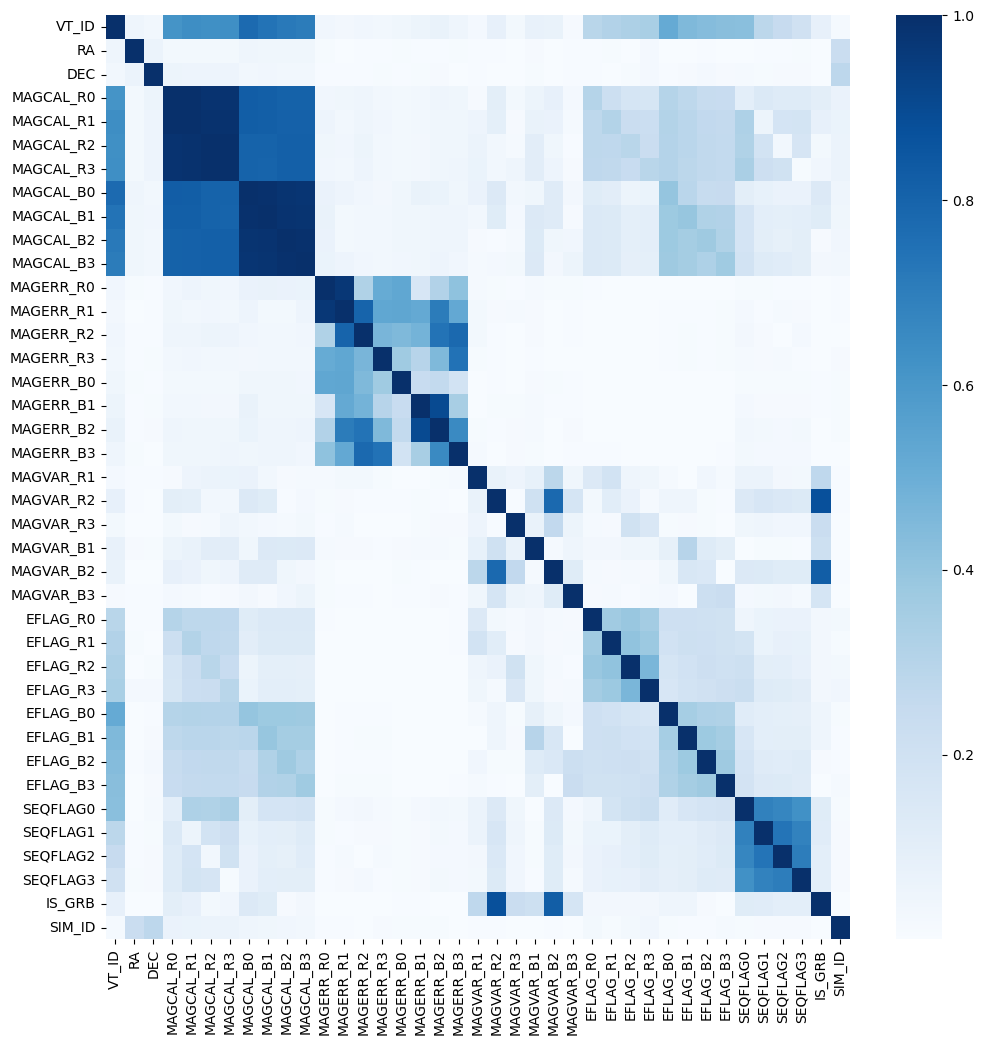

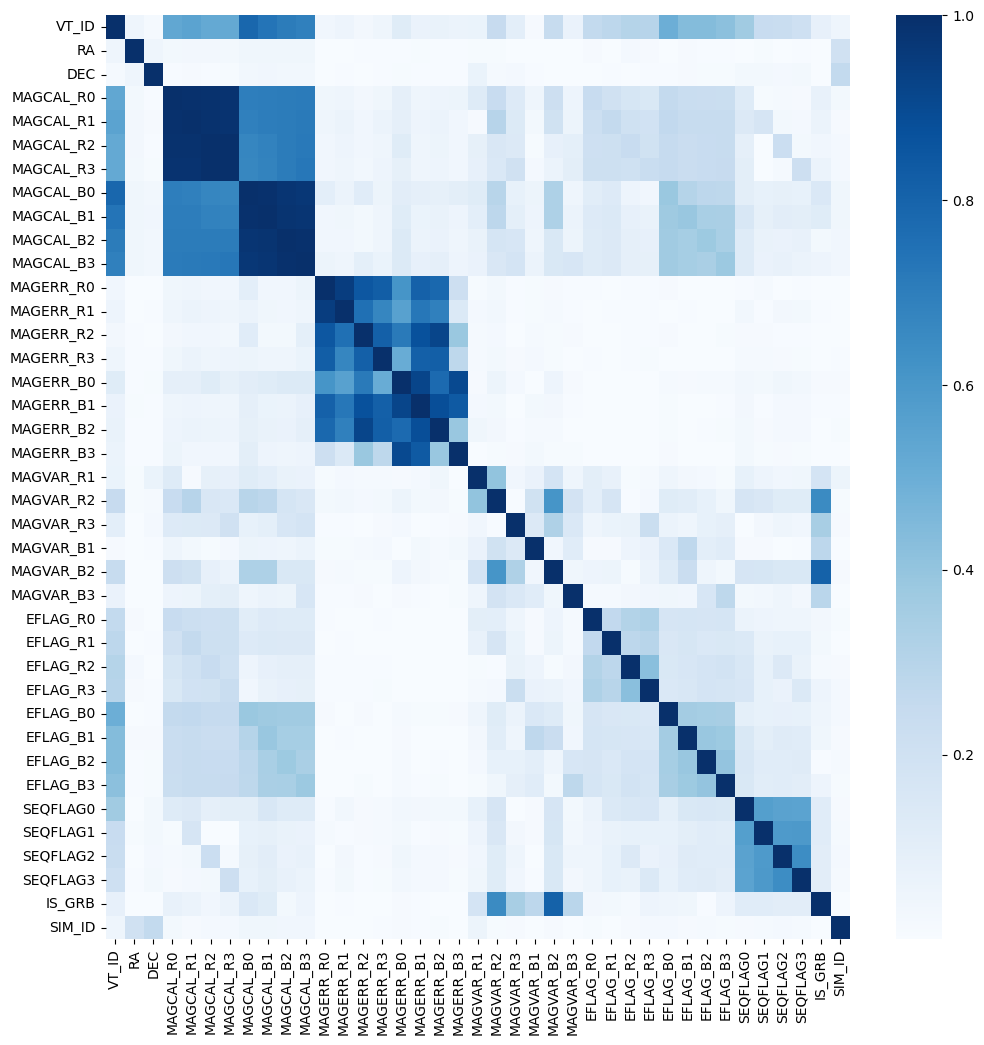

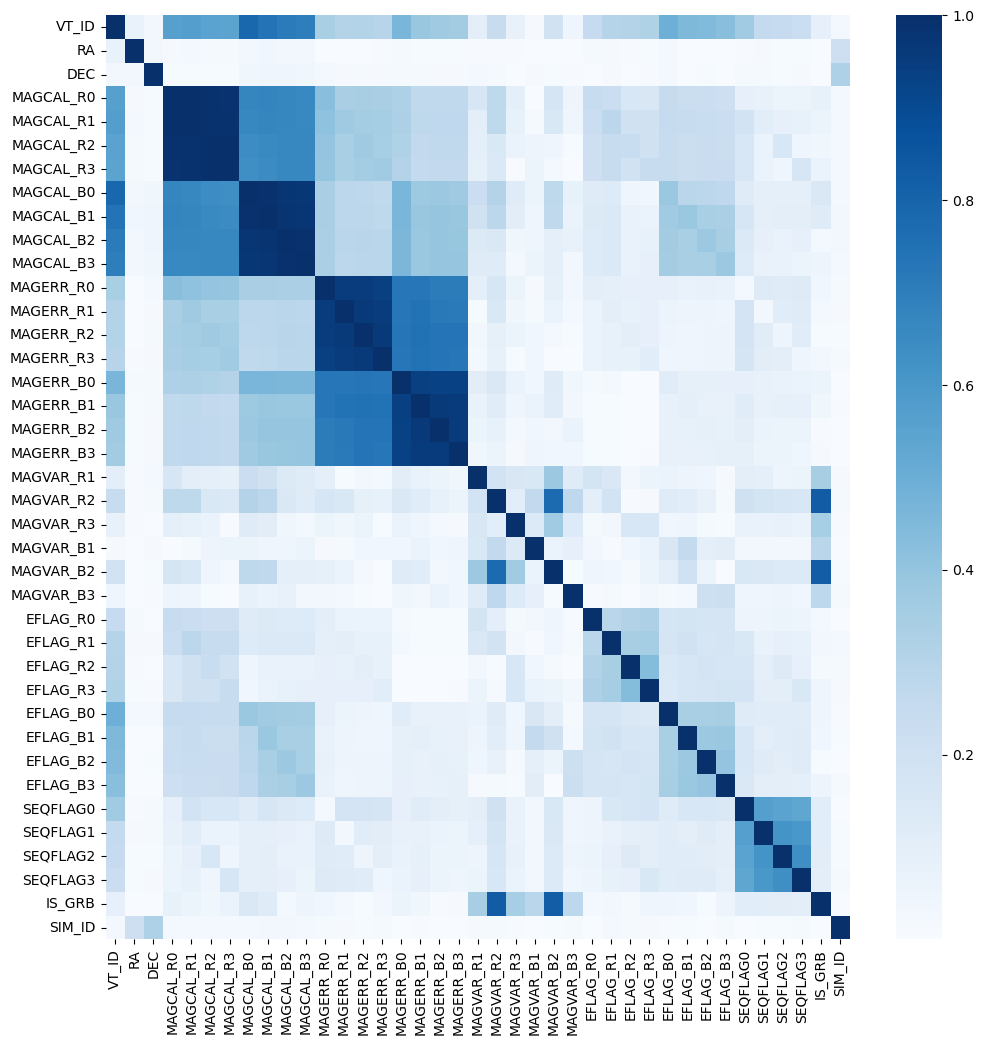

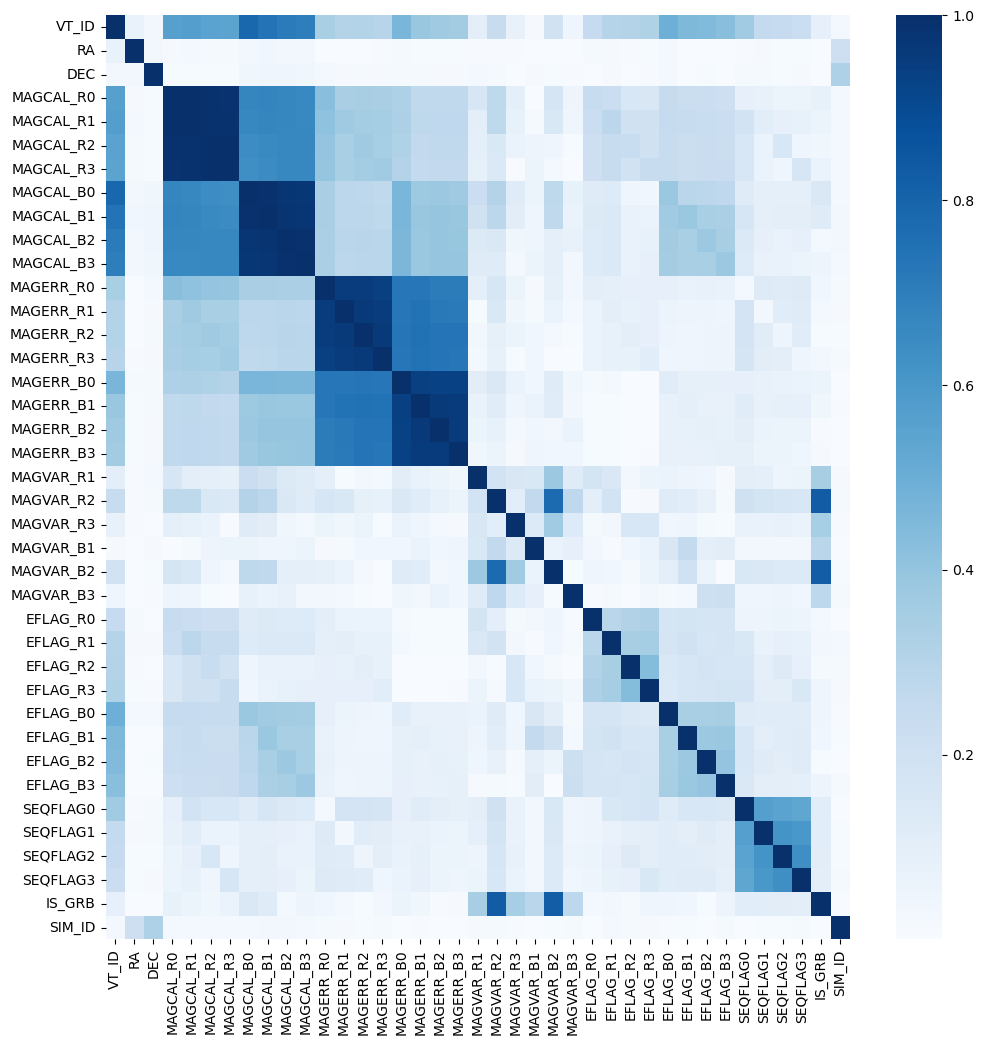

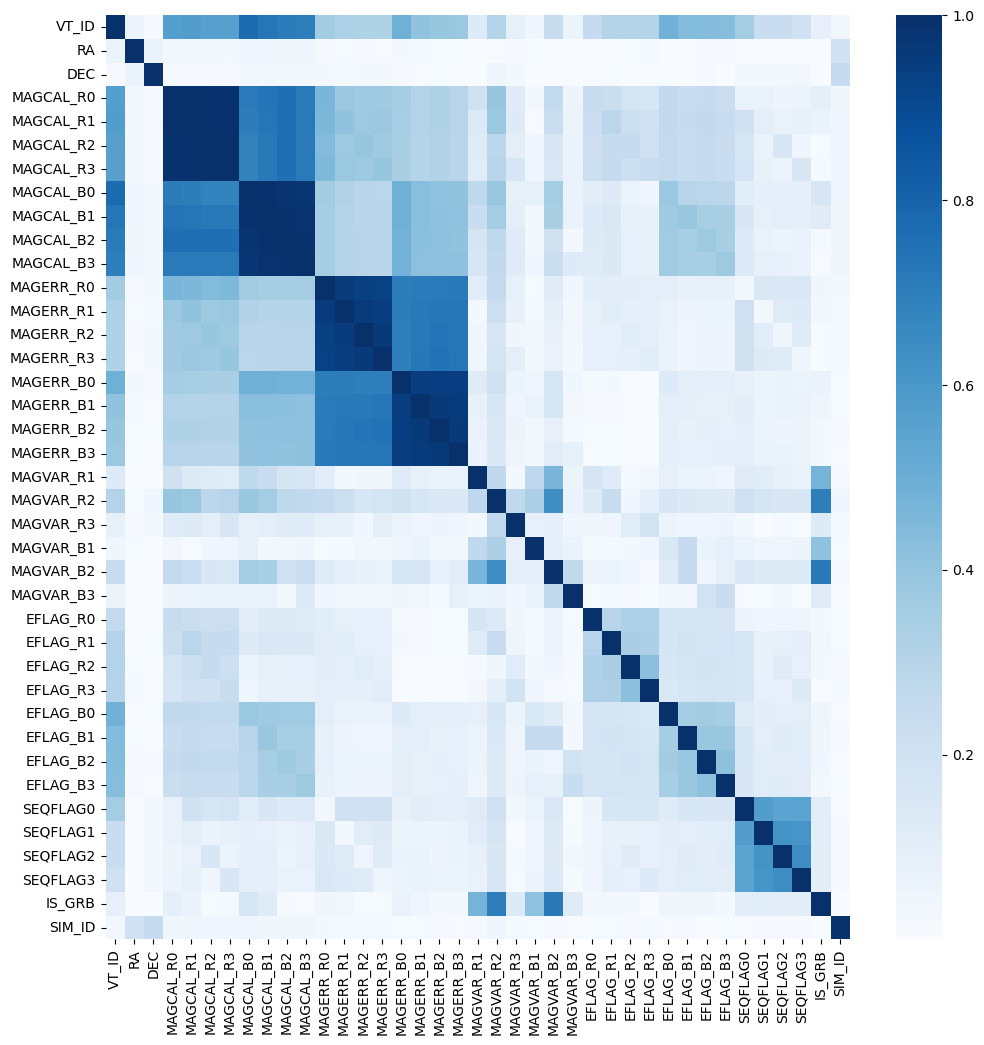

In [55]:
for case, sub_data in cases_dict.items():
    plt.figure(figsize=(12,12))
    corr_matrix = sub_data.corr()
    sns.heatmap(abs(corr_matrix), cmap='Blues')
    plt.show()

## Random Forest Model


Classifying using a random forest model. See doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Tuning Model

In [82]:
#X = data[[
#    "MAGVAR_R1",
#    "MAGVAR_R2",
#    "MAGVAR_R3",
#    "MAGVAR_B1",
#    "MAGVAR_B2",
#    "MAGVAR_B3",
#    "IS_GRB"]].dropna()
X = data.drop("CASE", axis=1).dropna() # Not sure this is the best way to handle missing values 
y = X.pop("IS_GRB")

param_grid = {
    'n_estimators': [10, 15],
    'max_depth': [4],
    'min_samples_split': [2, 3]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=15; total time=   0.6s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=15; total time=   0.6s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=15; total time=   0.5s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=15; total time=   0.6s
[CV] END ..max_depth=4, min_samples_split=2, n_estimators=15; total time=   0.5s
[CV] END ..max_depth=4, min_samples_split=3, n_estimators=10; total time=   0.3s
[CV] END ..max_depth=4, min_samples_split=3, n_es

In [58]:
data.columns

Index(['VT_ID', 'RA', 'DEC', 'MAGCAL_R0', 'MAGCAL_R1', 'MAGCAL_R2',
       'MAGCAL_R3', 'MAGCAL_B0', 'MAGCAL_B1', 'MAGCAL_B2', 'MAGCAL_B3',
       'MAGERR_R0', 'MAGERR_R1', 'MAGERR_R2', 'MAGERR_R3', 'MAGERR_B0',
       'MAGERR_B1', 'MAGERR_B2', 'MAGERR_B3', 'MAGVAR_R1', 'MAGVAR_R2',
       'MAGVAR_R3', 'MAGVAR_B1', 'MAGVAR_B2', 'MAGVAR_B3', 'EFLAG_R0',
       'EFLAG_R1', 'EFLAG_R2', 'EFLAG_R3', 'EFLAG_B0', 'EFLAG_B1', 'EFLAG_B2',
       'EFLAG_B3', 'SEQFLAG0', 'SEQFLAG1', 'SEQFLAG2', 'SEQFLAG3', 'IS_GRB',
       'CASE', 'SIM_ID'],
      dtype='object')

### Fitting Model

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)

In [84]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(conf_matrix)

[[29680     0]
 [    0   191]]


### Feature Importance


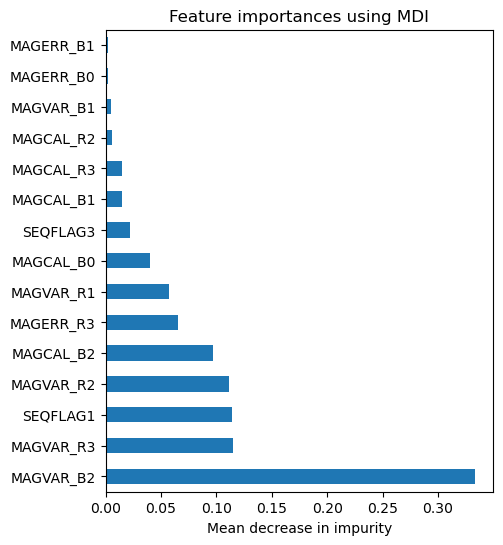

In [85]:
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,6))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.show()

### Visualizing the Random Forestfrom sklearn.tree import export_graphviz

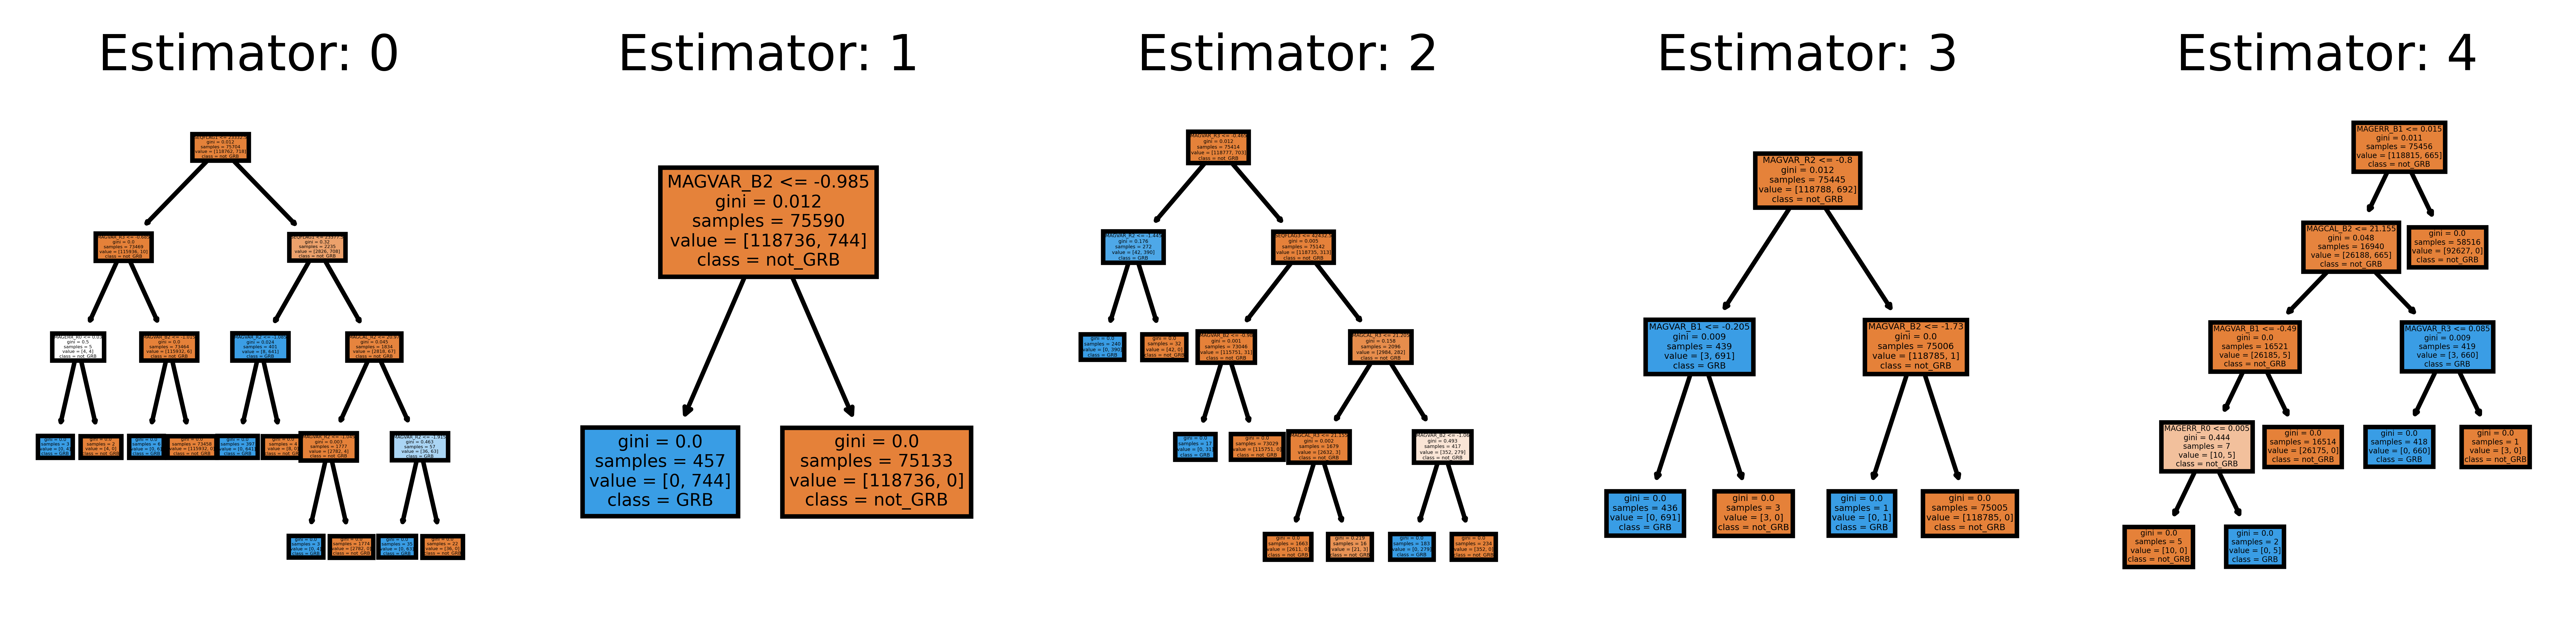

In [86]:
from sklearn import tree
fn=list(X.columns)
cn=["not_GRB", "GRB"]
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=1200)
for index in range(0, 5):
    tree.plot_tree(RFmodel.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

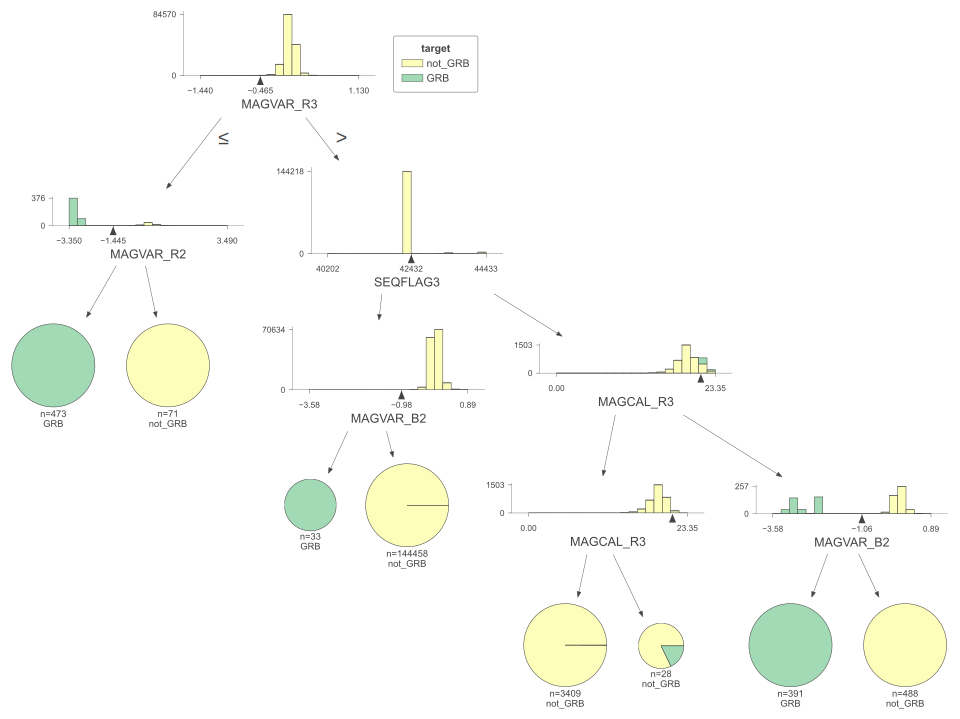

In [91]:
import dtreeviz 
#for index in range(0, 5):
viz = dtreeviz.model(RFmodel.estimators_[2], X, y,
                target_name="target",
                feature_names=fn,
                class_names=cn)

viz.view(scale=1.4) 
